In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Any, Union

CSV_DATA = Path().cwd().parent.parent / "data/2_loaded"

In [2]:
# Load the summary  for reference later
df_summary = pd.read_csv(CSV_DATA/'summary/ride_summary_good.csv')
df_summary['start_date'] = pd.to_datetime(df_summary['start_date'])
df_summary['year'] = df_summary['start_date'].dt.year
df_summary['month'] = df_summary['start_date'].dt.month
df_summary['month_name'] = df_summary['start_date'].dt.month_name()
df_summary['start_time'] = pd.to_timedelta(df_summary['start_time'])
df_summary['end_time'] = pd.to_timedelta(df_summary['end_time'])

## Handle categorical variables
month_order = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df_summary['month_name'] = pd.Categorical(df_summary['month_name'] , categories=month_order.keys(), ordered=True)

In [8]:
df_summary24 = df_summary.loc[df_summary['year']==2024].reset_index(drop=True)
df_summary24.head(10)

,ride_id,start_date,start_time,end_time,biker_weight_lbs,bike_weight,bag_weight,avg_speed,avg_cruising_speed,total_ride_time_sec,total_moving_time_sec,total_distance_mi,total_ascent_ft,total_descent_ft,avg_heart_rate,avg_power,avg_cadence,avg_ambient_temp_F,best_power_4s,best_power_5s,best_power_10s,best_power_20s,best_power_30s,best_power_1m,best_power_2m,best_power_3m,best_power_4m,best_power_5m,best_power_6m,best_power_10m,best_power_20m,best_power_30m,best_power_40m,best_power_1h,best_power_2h,year,month,month_name
0,0x65bfd8be,2024-02-04,0 days 18:34:38,0 days 19:28:53,220,25,0,9.527357,12.342948,3256.0,2351.0,8.458264,187.6732,279.5412,115.555538,65.028793,NaN,78.103880,310.255589,308.123565,291.439272,255.712946,235.955278,195.692452,147.293070,137.515048,132.528701,133.569889,131.174928,123.819794,100.665176,85.945107,80.512619,NaN,NaN,2024,2,February
1,0x65cbcb8d,2024-02-13,0 days 20:05:33,0 days 20:51:03,220,25,0,10.363345,13.050481,2731.0,1756.0,6.834804,242.7940,242.7940,NaN,81.952892,NaN,NaN,354.250825,351.659801,324.016790,269.726666,242.969958,209.420901,184.329614,149.468923,134.825479,127.061890,123.451692,117.591013,106.189645,94.502171,NaN,NaN,NaN,2024,2,February
2,0x661c5dfa,2024-04-14,0 days 22:51:38,0 days 23:14:49,220,25,0,5.725683,10.515063,1392.0,675.0,2.148722,225.7328,219.1708,117.258697,64.042326,NaN,85.496373,621.616926,613.770179,557.898004,423.739887,340.487773,271.976950,185.269449,139.440852,138.451007,137.619784,124.446161,96.657370,70.645655,NaN,NaN,NaN,NaN,2024,4,April
3,0x661ff649,2024-04-17,0 days 16:18:17,0 days 18:26:22,220,25,0,7.142026,12.506619,7686.0,3072.0,12.225232,1375.3952,1339.3042,144.480039,87.020642,NaN,83.411587,1170.473521,1158.334870,1073.148701,825.049190,596.478742,414.423510,361.223633,277.179928,217.968068,205.941190,201.338120,167.342438,153.785987,132.428478,113.835832,107.662383,NaN,2024,4,April
4,0x663a3144,2024-05-07,0 days 13:48:52,0 days 16:32:57,220,25,0,12.223941,14.645619,5280246.0,8762.0,35.946595,562.3634,547.9270,136.719535,99.213123,NaN,83.772700,342.918232,340.783854,318.812139,264.332044,235.599506,190.750307,175.318029,170.242772,163.004630,157.527646,154.944776,142.513938,130.809078,128.724365,124.516872,117.253850,105.76314,2024,5,May
5,0x663c00a2,2024-05-08,0 days 22:45:54,0 days 23:55:29,220,25,0,8.652486,10.287778,4176.0,2246.0,7.471199,657.1843,656.5281,NaN,89.754090,NaN,NaN,531.334783,525.811247,494.637429,426.247806,381.974504,328.935914,285.543303,245.595262,231.205603,245.508425,234.585140,171.447654,127.023064,109.203417,101.833759,NaN,NaN,2024,5,May
6,0x66452ebc,2024-05-15,0 days 21:53:00,0 days 23:24:13,220,25,0,12.071955,13.298839,5474.0,3455.0,13.192520,300.2115,299.2272,NaN,91.809308,NaN,NaN,538.578938,535.168991,513.367014,455.593648,406.180150,307.453199,208.742520,174.692446,148.241910,139.734390,139.086289,134.153966,108.388087,100.131336,95.667646,94.087060,NaN,2024,5,May
7,0x6647e479,2024-05-17,0 days 23:12:57,0 days 00:55:30,220,25,0,14.820830,15.589168,6154.0,3493.0,15.286096,262.1519,262.1519,NaN,130.205369,NaN,NaN,483.336974,474.137319,417.844343,322.169952,286.297521,267.139890,240.650760,238.074818,229.369084,209.055920,208.271654,200.659436,184.131321,163.012482,144.401665,131.524576,NaN,2024,5,May
8,0x6653585c,2024-05-26,0 days 15:42:20,0 days 16:10:25,220,25,0,10.272558,11.997267,1686.0,1038.0,3.707279,346.1455,345.4893,NaN,122.349943,NaN,NaN,601.359216,600.134853,591.879950,569.112684,552.564718,475.708726,368.238988,291.597926,243.445718,228.543115,220.277087,168.737013,132.389125,NaN,NaN,NaN,NaN,2024,5,May
9,0x6657ad77,2024-05-29,0 days 22:34:31,0 days 00:12:31,220,25,0,10.606017,12.403217,5881.0,2356.0,8.791491,683.1042,682.7761,NaN,115.805535,NaN,NaN,744.631330,734.497080,679.351453,541.024407,437.271497,412.277786,358.298343,315.488671,303.259288,263.828504,261.952850,230.578543,157.927507,136.891962,125.807889,NaN,NaN,2024,5,May


In [21]:
df_ride1 = pd.read_csv(CSV_DATA / "0x6647e479.csv")
df_ride1['time'] = pd.to_datetime(df_ride1['time'])
cols_of_interest = ['time','segment_id','delta_dist_ft','delta_ele_ft','filt_grade_saturated','heading']
df_ride1 = df_ride1.loc[df_ride1['delta_dist_ft']!=0.0, cols_of_interest]

In [22]:
df_ride1.head(10)

,time,segment_id,delta_dist_ft,delta_ele_ft,filt_grade_saturated,heading
1,2024-05-17 23:12:58+00:00,0.0,0.364813,0.0000,-0.013626,90.000000
3,2024-05-17 23:13:00+00:00,0.0,0.364813,0.0000,-0.098510,90.000000
4,2024-05-17 23:13:01+00:00,0.0,0.364813,0.0000,-0.170693,90.000000
5,2024-05-17 23:13:02+00:00,0.0,0.461755,0.0000,-0.253872,135.000000
6,2024-05-17 23:13:03+00:00,0.0,0.461755,0.0000,-0.339905,45.000000
7,2024-05-17 23:13:04+00:00,0.0,0.283071,0.0000,-0.420369,180.000000
8,2024-05-17 23:13:05+00:00,0.0,0.364813,0.0000,-0.487390,90.000000
11,2024-05-17 23:13:52+00:00,1.0,11.592614,-0.3281,-0.552424,73.810794
12,2024-05-17 23:13:53+00:00,1.0,1.574757,0.0000,-0.521662,143.130102
13,2024-05-17 23:13:54+00:00,1.0,0.782613,0.0000,-0.468795,243.434949


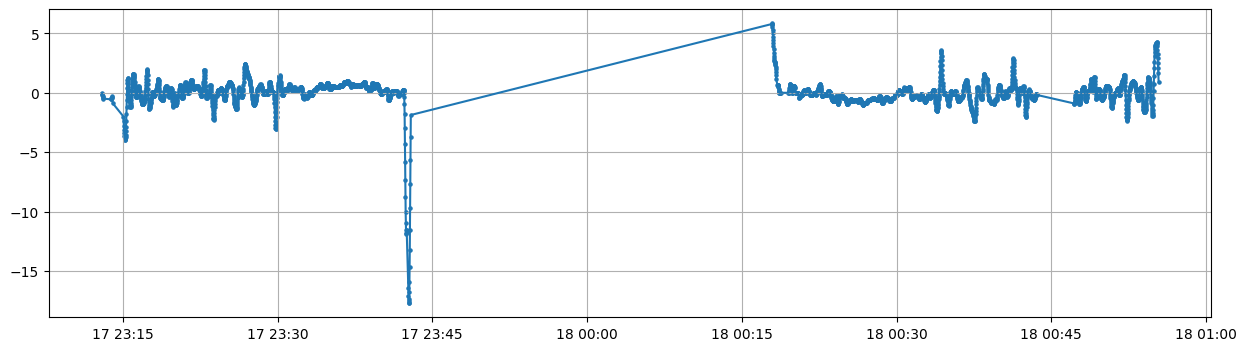

In [27]:
_ = plt.figure(figsize=(15,4))
_ = plt.plot(df_ride1['time'], df_ride1['filt_grade_saturated'])
_ = plt.scatter(df_ride1['time'], df_ride1['filt_grade_saturated'], s=5)
_ = plt.grid()

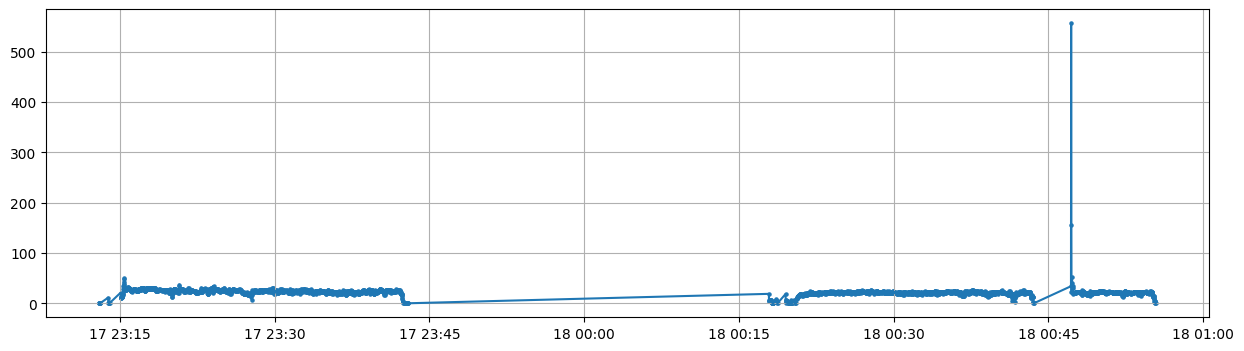

In [28]:
_ = plt.figure(figsize=(15,4))
_ = plt.plot(df_ride1['time'], df_ride1['delta_dist_ft'])
_ = plt.scatter(df_ride1['time'], df_ride1['delta_dist_ft'], s=5)
_ = plt.grid()